In [2]:
import glob
import math
import os
import pickle

import seaborn as sns 
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, Polygon
from matplotlib.lines import Line2D


In [3]:
with open('outputs/twins_era_identified_regions_min_2.pkl', 'rb') as f:
	regions = pickle.load(f)
df = pd.read_csv('supermag-stations-info.csv')

In [4]:
def converting_from_degrees_to_km(lat_1, lon_1, lat_2, lon_2):

	mean_lat = (lat_1 + lat_2)/2
	x = lon_2 - lon_1
	y = lat_2 - lat_1
	dist_x = x*(111.320*math.cos(math.radians(mean_lat)))
	dist_y = y*110.574

	distance = math.sqrt((dist_x**2)+(dist_y**2))

	return distance

In [5]:
df

,IAGA,GEOLON,GEOLAT,AACGMLON,AACGMLAT,STATION-NAME,OPERATOR-NUM,OPERATORS
0,SON,66.44,25.12,139.81,19.36,Sonmiani,1,INTERMAGNET
1,AMU,210.13,61.24,-93.38,61.32,Anchorage,1,THEMIS
2,YKC,245.52,62.48,-56.85,69.42,Yellowknife,3,CANMOS
3,CBB,254.97,69.12,-47.81,77.05,Cambridge Bay,2,CANMOS
4,RES,265.11,74.69,-35.54,82.93,Resolute Bay,2,CANMOS
...,...,...,...,...,...,...,...,...
569,MHV,37.73,54.94,112.36,51.27,Mikhnevo,1,IZMIRAN
570,NAD,72.51,65.53,147.36,61.94,Nadym,1,IZMIRAN
571,WSE,33.10,66.55,112.22,63.39,White Sea,1,IZMIRAN
572,POD,90.03,61.58,164.07,57.82,Bor,1,IZMIRAN


In [6]:
def plotting_regions(regions, region_numbers, lat_min, lat_max, lon_min, lon_max, lat_med, lon_med, station_info):

	colors = sns.color_palette('tab20', len(regions))
	
	face_alpha = 0.5
	edge_alpha = 0.8

	for i, region in zip(range(0, len(regions), 2), region_numbers):
		poly = regions[f'region_{region}']['shape'].convex_hull
		poly = gpd.GeoDataFrame(geometry=[poly])

		poly.loc[poly['geometry'].centroid.x > 180, 'geometry'] = poly.loc[
			poly['geometry'].centroid.x > 180, 'geometry'
		].translate(xoff=-360)

		if i == 0:
			ax = poly.plot(figsize=(20,15), facecolor=colors[i+1], edgecolor=colors[i], label=region, alpha=0.5)
		else:
			poly.plot(ax=ax, facecolor=colors[i+1], edgecolor=colors[i], label=region, alpha=0.5)
	
	world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
	# world['geometry'] = world['geometry'].translate(xoff=-360)


	# Plot the outline of the Earth
	world.boundary.plot(linewidth=1, color='black', ax=plt.gca(), alpha=0.2)

	# station_info.plot(ax=ax, kind='scatter', x='GEOLON', y='GEOLAT')
	# for idx, row in station_info.iterrows():
	# 	ax.annotate(row['IAGA'], (row['GEOLON'], row['GEOLAT']))
	
	# plt.xlim((lon_min-5), (lon_max+5))
	# plt.ylim((lat_min-5), (lat_max+5))
	plt.ylim(0,90)
	plt.margins(x=0)
	plt.title(f'Lat: {lat_med} Lon: {lon_med}')
	
	# Create custom legend entries using Line2D
	legend_entries = [Line2D([0], [0], color=colors[i], lw=2, label=reg) for i,reg in zip(range(0,len(colors),2), region_numbers)]
	
	# Add the custom legend to the plot
	# plt.legend(handles=legend_entries)


	plt.show()

/tmp/ipykernel_1740765/2573763462.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


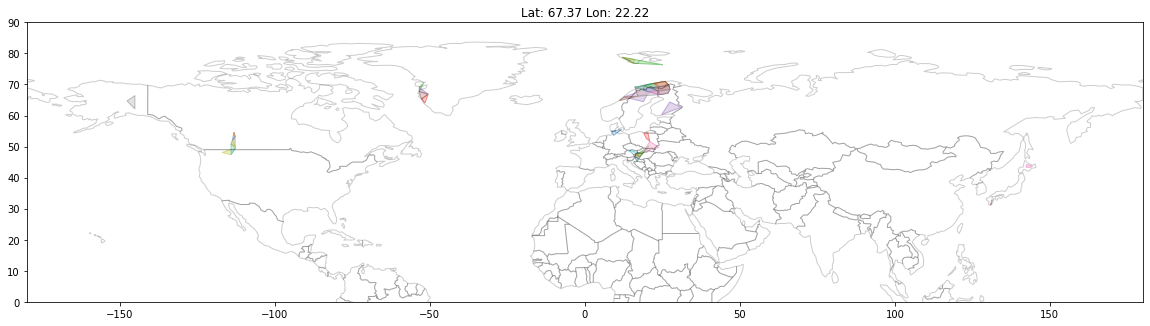

In [11]:
# positive regions
pos_region_numbers = [83, 143, 223, 44, 173, 321, 366, 383, 122, 279, 14, 95, 237, 26, 166, 86,
						387, 61, 202, 287, 207, 361, 137, 184, 36, 19, 9, 163, 16, 270, 194, 82, 
						62, 327, 293, 241, 107, 55, 111]

# grid filling regions
fil_region_numbers = [299, 298, 348, 148, 43, 69, 164, 268, 183, 360, 15, 400, 303, 128, 309, 130, 134, 131,
						28, 33]

# all regions
all_region_numbers = [299, 298, 348, 148, 43, 69, 164, 268, 183, 360, 15, 400, 303, 128, 309, 130, 134, 131,
						28, 33, 83, 143, 223, 44, 173, 321, 366, 383, 122, 279, 14, 95, 237, 26, 166, 86, 387,
						61, 202, 287, 207, 361, 137, 184, 36, 19, 9, 163, 16, 270, 194, 82, 62, 327, 293, 241,
						107, 55, 111]

stations = []

for i in range(len(pos_region_numbers)):
	stations = stations+ regions[f'region_{pos_region_numbers[i]}']['station']

lats = [df.loc[df['IAGA'] == station, 'GEOLAT'].values[0] for station in stations]
lons = [df.loc[df['IAGA'] == station, 'GEOLON'].values[0] for station in stations]

lat_min, lat_max, lat_med = min(lats), max(lats), np.median(lats)
lon_min, lon_max, lon_med = min(lons), max(lons), np.median(lons)

plotting_regions(regions, pos_region_numbers, lat_min, lat_max, lon_min, lon_max, lat_med, lon_med, df)

In [272]:
# defining the twins era start and end times
twins_start = pd.to_datetime('2010-01-01')
twins_end = pd.to_datetime('2017-12-31')
twins_time_period = pd.date_range(start=twins_start, end=twins_end, freq='min')

grid_df = pd.DataFrame(index=twins_time_period)

		

for reg in region_numbers:

	poly = regions[f'region_{reg}']['shape'].convex_hull
	poly = gpd.GeoDataFrame(geometry=[poly])

	ymin = poly.total_bounds[1]
	ymax = poly.total_bounds[3]

	max_rsd = checking[f'region_{reg}']['max_rsd']

	temp_df = pd.DataFrame(index=twins_time_period)
	temp_df[f'region_{reg}_top'] = np.where(pd.isna(max_rsd['max_rsd']), np.nan, ymax)
	temp_df[f'region_{reg}_bottom'] = np.where(pd.isna(max_rsd['max_rsd']), np.nan, ymin)
	
	grid_df = pd.concat([grid_df, temp_df], ignore_index=False, axis=1)

	


In [268]:
def plotting_grid_availibility(region_numbers, grid_df, legend=False):

	fig = plt.figure(figsize=(20,13))
	ax = plt.subplot(1,1,1)

	plt.xlim(twins_start, twins_end)

	for reg in region_numbers:
		plt.fill_between(grid_df.index, grid_df[f'region_{reg}_bottom'], grid_df[f'region_{reg}_top'], alpha=1, label=reg,
							where=np.array(grid_df[f'region_{reg}_top'])>np.array(grid_df[f'region_{reg}_bottom']))
	plt.ylabel('Latitude')
	plt.xlabel('Date')

	if legend:
		plt.legend()

	plt.show()

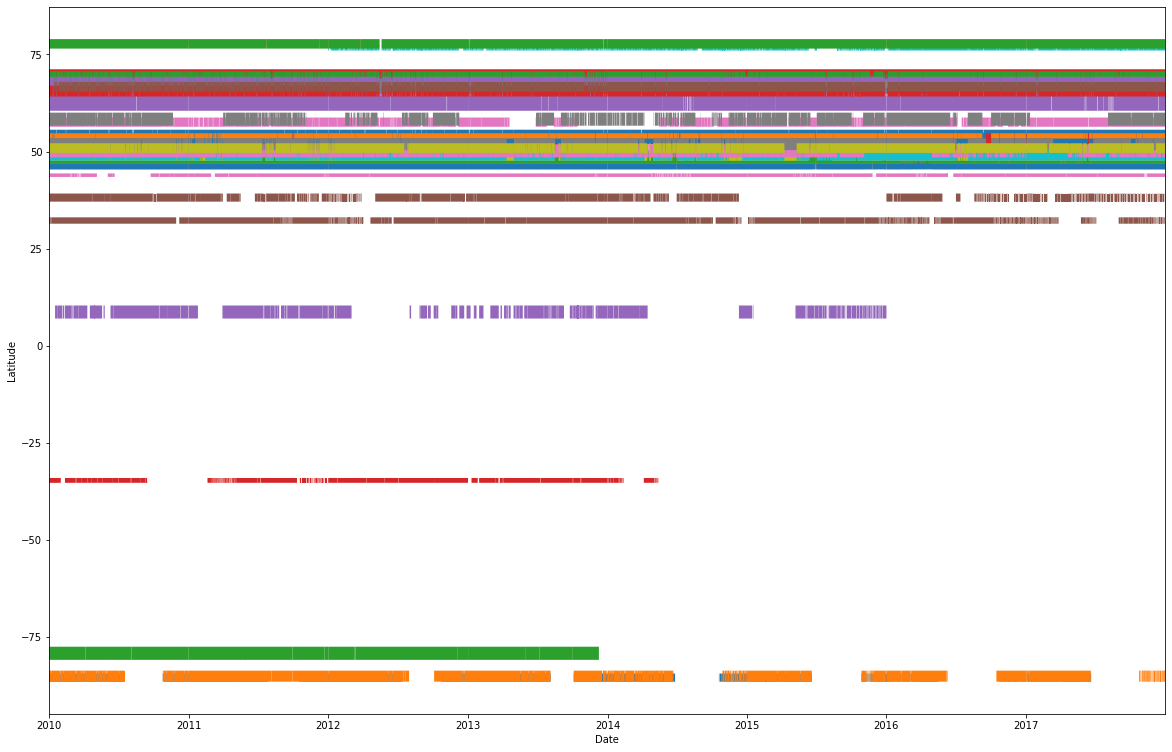

In [274]:
plotting_grid_availibility(region_numbers, grid_df)

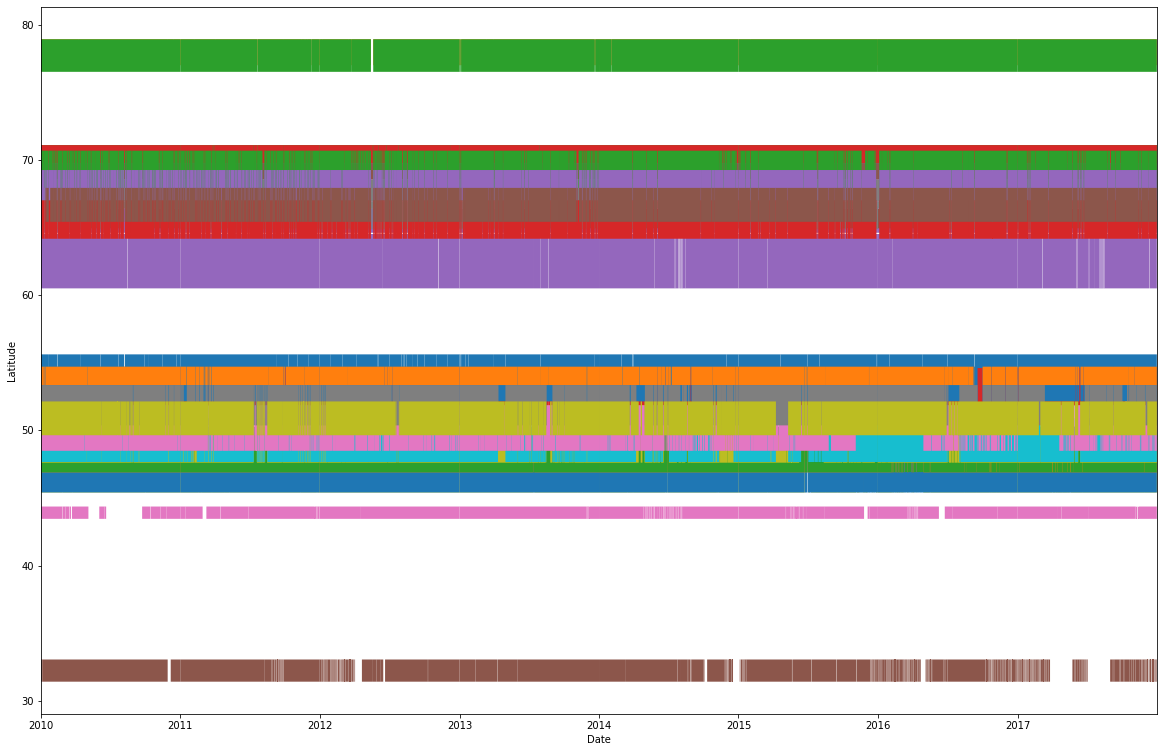

In [275]:
full_region_numbers = [83, 143, 223, 44, 173, 321, 366, 383, 122, 279, 14, 95, 237, 26, 166, 86, 387, 61, 202, 287, 207, 
361, 137, 184, 36, 19, 9, 163, 16, 270, 194, 82, 62, 327, 293, 241, 107, 55, 111]

plotting_grid_availibility(full_region_numbers, grid_df)

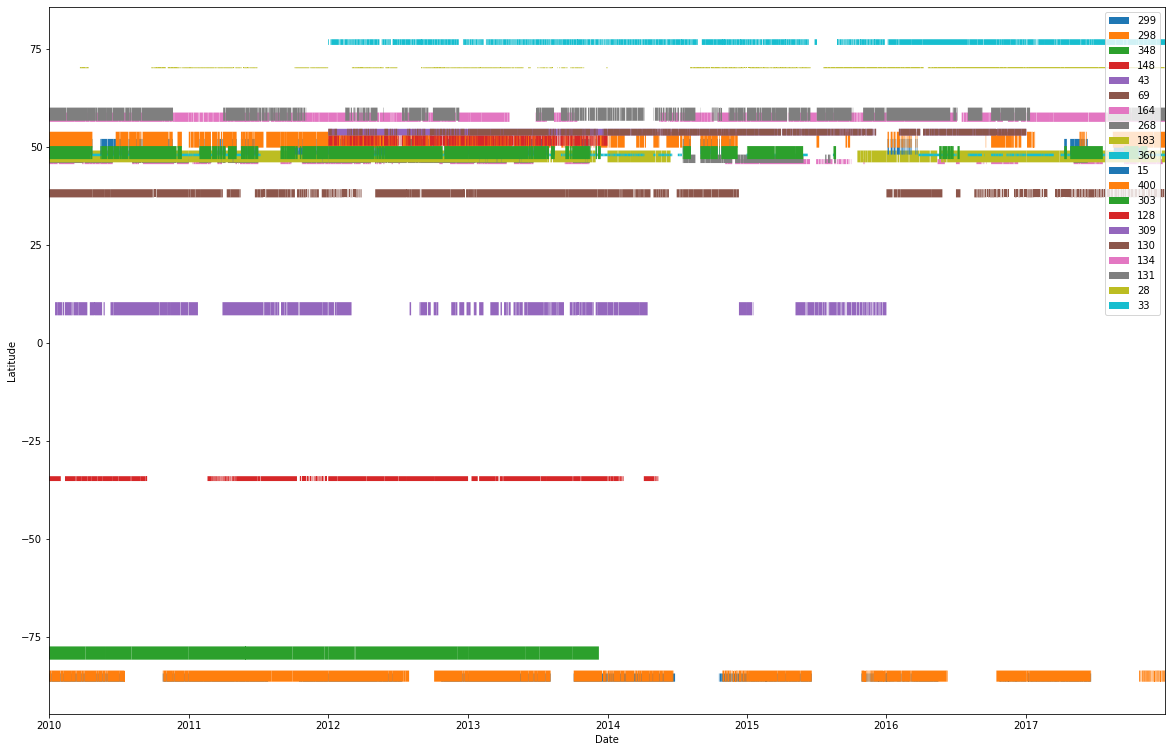

: 

In [276]:
# grid filling regions
filler_region_numbers = [299, 298, 348, 148, 43, 69, 164, 268, 183, 360, 15, 400, 303, 128, 309, 130, 134, 131, 28, 33]
plotting_grid_availibility(filler_region_numbers, grid_df, legend=True)

In [234]:
with open('outputs/twins_era_stats_dict_radius_regions_min_2.pkl', 'rb') as f:
		checking = pickle.load(f)

In [248]:
poly = regions[f'region_4']['shape'].convex_hull
poly = gpd.GeoDataFrame(geometry=[poly])
print(poly.total_bounds)
print(poly.total_bounds[1])


[11.27999973 43.97000122 12.07999992 48.16999817]
43.970001220703125


In [252]:
checking['region_4']['max_rsd']

,max_rsd,max_rsd_station
2010-01-01 00:00:00,NaN,NaN
2010-01-01 00:01:00,NaN,NaN
2010-01-01 00:02:00,NaN,NaN
2010-01-01 00:03:00,NaN,NaN
2010-01-01 00:04:00,NaN,NaN
...,...,...
2017-12-30 23:56:00,NaN,NaN
2017-12-30 23:57:00,NaN,NaN
2017-12-30 23:58:00,NaN,NaN
2017-12-30 23:59:00,NaN,NaN
